In [ ]:
import json
import csv
from google.colab import files
uploaded = files.upload()

Saving matches.json to matches.json


Total Likes Sent: 71033
Total Matches from Likes Sent: 1327
Match % from Likes Sent: 2 %
Total Likes Received: 44
Total Matches from Likes Received: 12
Match % from Likes Received: 27 %


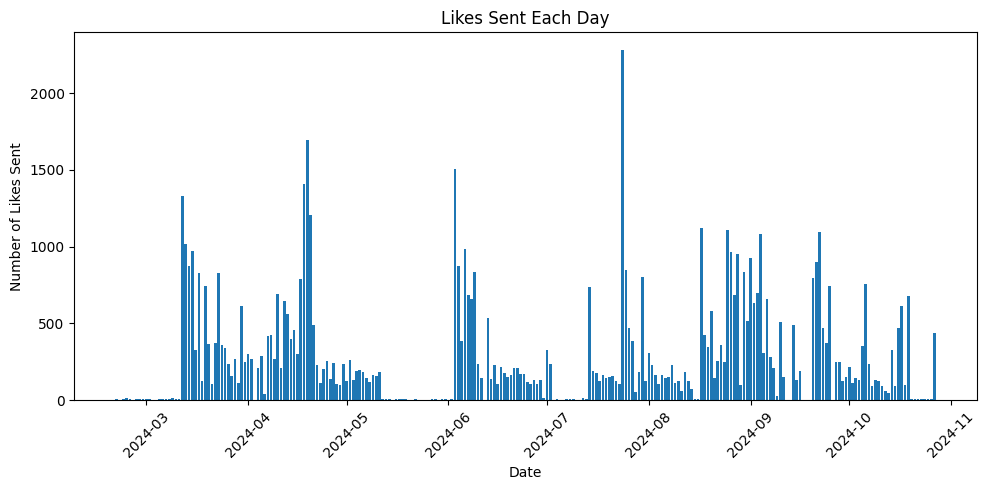

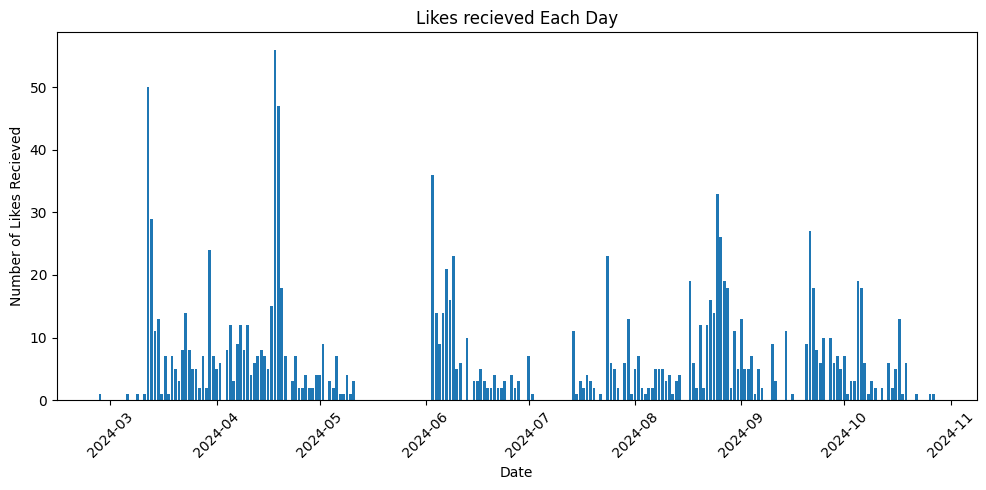

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
with open("matches.json") as m:
    matches = json.load(m)

# normalize the JSON using pandas
data = pd.json_normalize(matches)



# Assuming 'data' is your list of interactions

# outgoing likes, match
outgoing_matches = data.loc[(data["like"].isna() == False) & (data["match"].isna() == False)].reset_index()

# outgoing likes, no match
outgoing_no_matches = data.loc[(data["like"].isna() == False) & (data["match"].isna() == True)].reset_index()

# incoming likes, match
incoming_match = data.loc[(data["match"].isna() == False) & (data["like"].isna() == True)].reset_index()

# incoming likes, no match
incoming_no_match = data.loc[(data["like"].isna() == True) & (data["match"].isna() == True)].reset_index()

# Here's a quick sanity check for if we're categorizing things correctly.
# The sum of the length of the 4 categories should be equal to the sum of
# the length of the original data.
# ------------------------------------------------------------------------
# num_items_categorized = len(outgoing_matches) + len(outgoing_no_matches) + len(incoming_match) + len(incoming_no_match)
# num_items_og_data = len(data)
#
# print("Num. Categorized Items: ", num_items_categorized)
# print("Num. Items OG Data: ", num_items_og_data)
#
# if num_items_categorized == num_items_og_data:
#     print("The number of items is the same.")
# else:
#     print("The number of items is not the same. Check your work")

# ==================================
# Quick Stats
# -----------
# This prints out some quick stats
# from the data we're working with.
# ==================================
print("Total Likes Sent:", len(outgoing_matches) + len(outgoing_no_matches))
print("Total Matches from Likes Sent:", len(outgoing_matches))
print("Match % from Likes Sent:", round(len(outgoing_matches) / (len(outgoing_matches) + len(outgoing_no_matches)) * 100), "%")

print("Total Likes Received:", len(incoming_match) + len(incoming_no_match))
print("Total Matches from Likes Received:", len(incoming_match))
print("Match % from Likes Received:", round(len(incoming_match) / (len(incoming_match) + len(incoming_no_match)) * 100), "%")
sent_like_timestamps = []
for i in range(0, len(outgoing_matches)):
    sent_like_timestamps.append(outgoing_matches["like"][i][0]["timestamp"])

# sent like, no match
# --------------------
sent_like_no_match_timestamps = []
for i in range(0, len(outgoing_no_matches)):
    sent_like_no_match_timestamps.append(outgoing_no_matches["like"][i][0]["timestamp"])

# received like, no match
rec_no_match_timestamps = []
for i in range(0, len(incoming_no_match)):
    rec_no_match_timestamps.append(incoming_no_match["block"][i][0]["timestamp"])

# received like, match
rec_match_timestamps = []
for i in range(0, len(incoming_match)):
    rec_match_timestamps.append(incoming_match["match"][i][0]["timestamp"])

# take these lists of timestamps, create a dataframe with the timestamp and "like type"
sent_match = pd.DataFrame({"Timestamp":sent_like_timestamps, "Type":"Sent Like, Match"})
sent_no_match = pd.DataFrame({"Timestamp":sent_like_no_match_timestamps, "Type":"Sent Like, No Match"})
rec_match = pd.DataFrame({"Timestamp":rec_match_timestamps, "Type":"Received Like, Match"})
rec_no_match = pd.DataFrame({"Timestamp":rec_no_match_timestamps, "Type":"Received Like, No Match"})

dfs = [sent_match, sent_no_match, rec_match, rec_no_match]

# create clean dataset
clean_data = pd.concat(dfs).reset_index().drop('index', axis = 1)
clean_data["Timestamp"] = pd.to_datetime(clean_data["Timestamp"])
clean_data["Date"] = clean_data["Timestamp"].dt.date

data=clean_data
sent_likes = data[data['Type'] == 'Sent Like, No Match']

# Group the data by date and count the number of likes sent each day
daily_likes = sent_likes.groupby('Date').size().reset_index(name='Likes Sent')

# Create a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(daily_likes['Date'], daily_likes['Likes Sent'])
plt.title('Likes Sent Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Likes Sent')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
sent_likes = data[data['Type'] == 'Sent Like, Match']

# Group the data by date and count the number of likes sent each day
daily_likes = sent_likes.groupby('Date').size().reset_index(name='Likes Sent')

# Create a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(daily_likes['Date'], daily_likes['Likes Sent'])
plt.title('Likes recieved Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Likes Recieved')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()